In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [3]:
df_train = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")
df_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

# Data Inspection

In [4]:
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [5]:
df_train.shape

(750000, 18)

In [6]:
df_train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [7]:
for i in df_train:
    print(i)
    print(df_train[i].unique())

id
[     0      1      2 ... 749997 749998 749999]
age
[42 38 36 27 26 24 39 50 46 32 37 57 33 47 35 49 77 40 54 56 51 30 67 58
 59 45 43 29 48 31 28 34 60 52 41 81 23 62 53 72 55 25 44 61 63 69 75 71
 64 22 83 70 80 21 65 74 68 19 73 66 79 20 84 86 76 18 82 78 87 85 88 94
 93 89 92 95 90 91]
job
['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
marital
['married' 'single' 'divorced']
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
balance
[    7   514   602 ... 13023  4003  8218]
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
day
[25 18 14 28  3 20 21 31  4  8  5 24 11 12 26 30  6 10 19 17  2 13 29 23
 27  7  9 16  1 22 15]
month
['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']
duration
[ 117  185  111 ... 4817 2455 2040]
campaign
[ 3  1  2 25  5  7  4 11  6  9  8 16 10 15 12 13 19 17 14 22 23 34 18 2

In [8]:
#irrelevant column
df_train=df_train.drop('id',axis=1) 
df_test=df_test.drop('id',axis=1) 

In [9]:
df_train.duplicated().sum() #no duplicates

0

In [10]:
df_train.isnull().sum() #no nulls but dataset inspection shows the value "unknown" several times.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df_train[['poutcome','contact']]=df_train[['poutcome','contact']].replace('unknown',pd.NA)
nulls=df_train.isnull().sum()
print(nulls)
print("Null percentages:")
print( (nulls / 750000) *100 )

#I won't deal with job and education unknowns as nulls, I'll consider them a category cause they're a few

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact      231627
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome     672450
y                 0
dtype: int64
Null percentages:
age           0.0000
job           0.0000
marital       0.0000
education     0.0000
default       0.0000
balance       0.0000
housing       0.0000
loan          0.0000
contact      30.8836
day           0.0000
month         0.0000
duration      0.0000
campaign      0.0000
pdays         0.0000
previous      0.0000
poutcome     89.6600
y             0.0000
dtype: float64


In [12]:
df_test[['poutcome','contact']]=df_test[['poutcome','contact']].replace('unknown',pd.NA)
nulls=df_test.isnull().sum()
print(nulls)
print("Null percentages:")
print( (nulls / 750000) *100 )

age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact       76896
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome     224115
dtype: int64
Null percentages:
age           0.0000
job           0.0000
marital       0.0000
education     0.0000
default       0.0000
balance       0.0000
housing       0.0000
loan          0.0000
contact      10.2528
day           0.0000
month         0.0000
duration      0.0000
campaign      0.0000
pdays         0.0000
previous      0.0000
poutcome     29.8820
dtype: float64


In [13]:
df_train.drop('poutcome',axis=1,inplace=True)
df_test.drop('poutcome',axis=1,inplace=True)

In [14]:
df_train=df_train.fillna({'contact':df_train['contact'].mode()[0]}) 
df_test=df_test.fillna({'contact':df_test['contact'].mode()[0]}) 

In [15]:
print('train')
nulls=df_train.isnull().sum()
print(nulls)
print(df_train.shape)
print('test')
nulls=df_test.isnull().sum()
print(nulls)
print(df_test.shape)

train
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64
(750000, 16)
test
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64
(250000, 15)


# Visualisation

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='marital', ylabel='Count'>

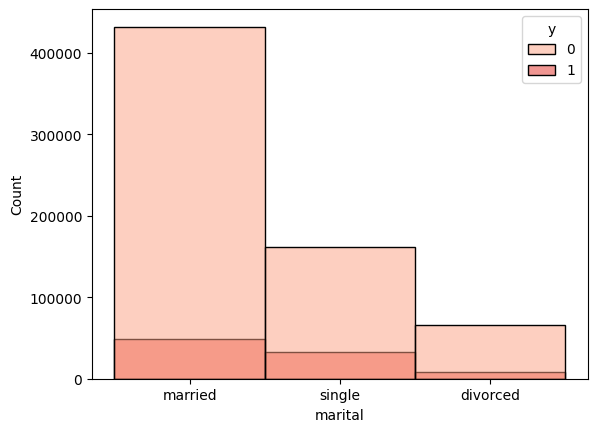

In [17]:
sns.histplot(x='marital',hue='y',data=df_train,palette='Reds')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

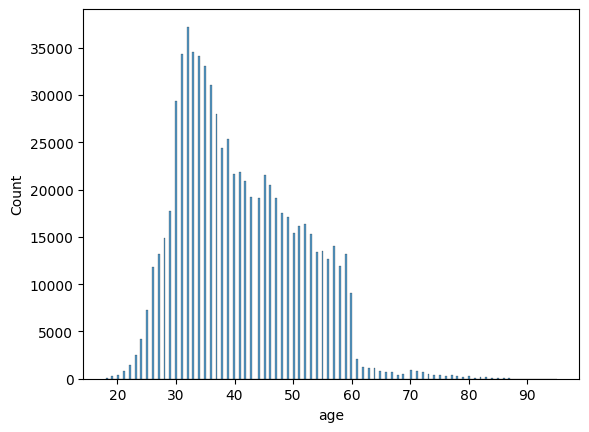

In [18]:
sns.histplot(x='age',data=df_train) #a bit skew

<Axes: xlabel='job', ylabel='count'>

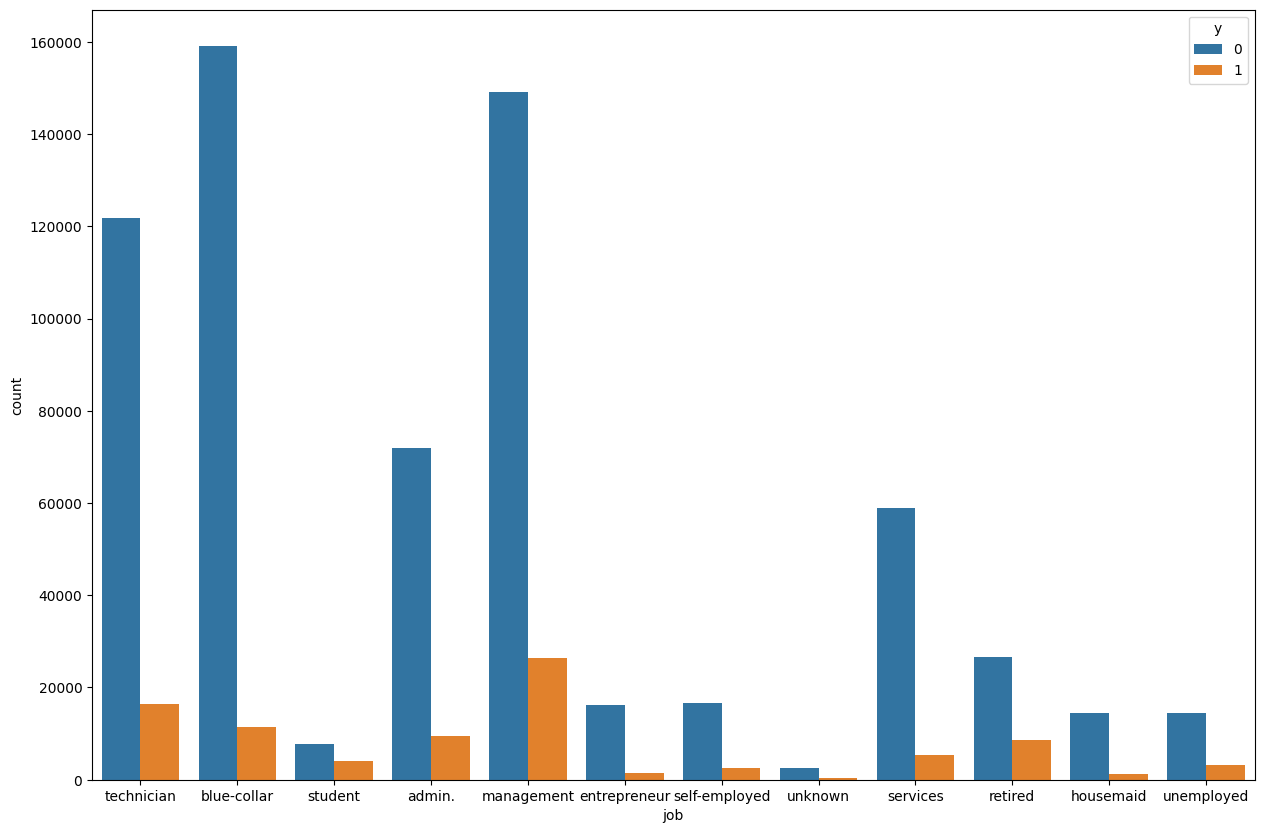

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x='job',data=df_train,hue='y')

<Axes: xlabel='education', ylabel='count'>

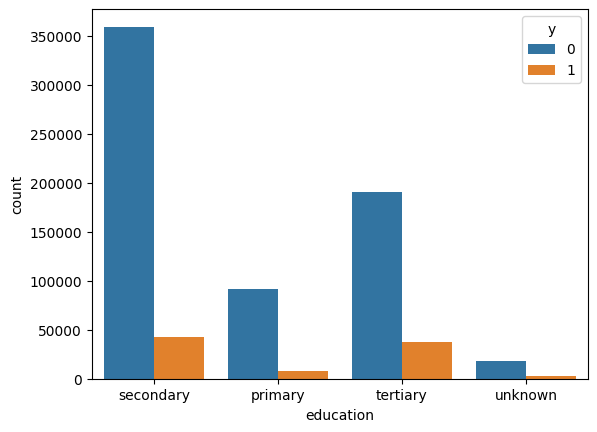

In [20]:
sns.countplot(x='education',data=df_train,hue='y')

<Axes: xlabel='y', ylabel='count'>

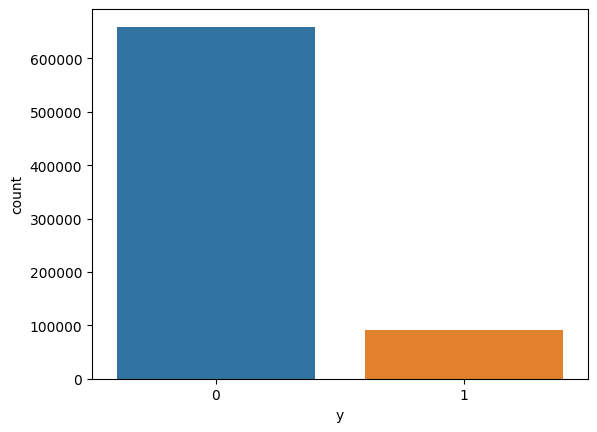

In [21]:

sns.countplot(data=df_train,x='y') #DATASET IS IMBALANCED: one class has significantly fewer instances than the other

In [22]:
numerical_features=(df_train.drop('y',axis=1)).select_dtypes(include=['int64','float64'])
categorical_features = df_train.select_dtypes(exclude=['int64', 'float64'])

<Axes: >

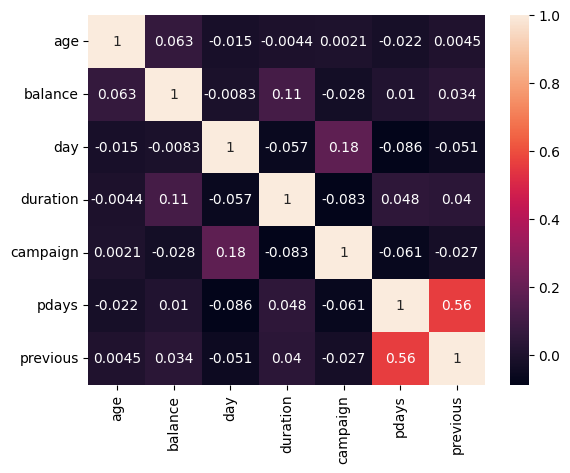

In [23]:
corr=numerical_features.corr()
sns.heatmap(data=corr,annot=True)

<Axes: ylabel='balance'>

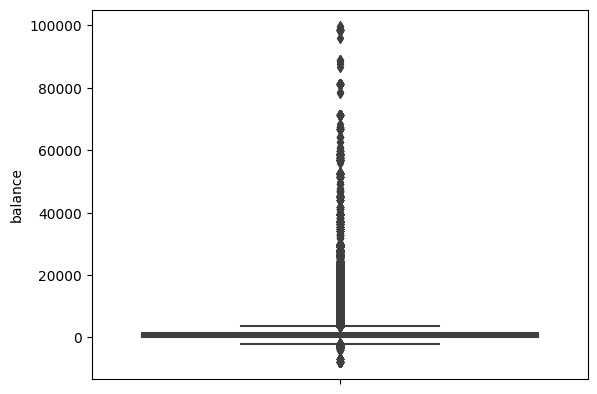

In [24]:
sns.boxplot(y='balance',data=df_train) #outliers 

<Axes: ylabel='age'>

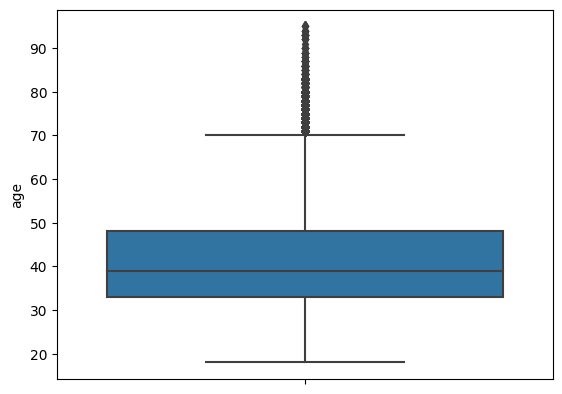

In [25]:
sns.boxplot(y='age',data=df_train)

Features 

In [26]:
from sklearn.feature_selection import f_classif #correlation of numerical features with target using ANOVA
for i in numerical_features:
  f_value,p_value=f_classif(numerical_features[i].values.reshape(-1,1),df_train['y'])
  print(f"Feature: {i}, F-value: {f_value}, P-value: {p_value}")

Feature: age, F-value: [68.02570473], P-value: [1.61634397e-16]
Feature: balance, F-value: [11428.61757511], P-value: [0.]
Feature: day, F-value: [1851.53133228], P-value: [0.]
Feature: duration, F-value: [276910.92729312], P-value: [0.]
Feature: campaign, F-value: [4337.4096092], P-value: [0.]
Feature: pdays, F-value: [6025.7586653], P-value: [0.]
Feature: previous, F-value: [10874.88732046], P-value: [0.]


| Feature  | F-value   | P-value   | Interpretation                                 |
| -------- | --------- | --------- | ---------------------------------------------- |
| age      | 68.03     | \~1.6e-16 | **Statistically significant**, moderate effect |
| balance  | 11,428.62 | \~0       |  Strong predictor                             |
| day      | 1,851.53  | \~0       |  Strong predictor                             |
| duration | 276,911   | \~0       |  **Extremely predictive**                    |
| campaign | 4,337.41  | \~0       |  Strong predictor                             |
| pdays    | 6,025.76  | \~0       |  Strong predictor                             |
| previous | 10,874.89 | \~0       |  Strong predictor                             |


In [27]:
from scipy.stats import chi2_contingency #correlation of categorical features with target using chi-square
for i in categorical_features:
  contingency_table = pd.crosstab(df_train[i], df_train['y'])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  print(f"Feature: {i}, Chi-square: {chi2}, P-value: {p}")

Feature: job, Chi-square: 18558.875547641317, P-value: 0.0
Feature: marital, Chi-square: 6210.478555926852, P-value: 0.0
Feature: education, Chi-square: 6007.8558379422475, P-value: 0.0
Feature: default, Chi-square: 680.3226427423159, P-value: 5.685409277005814e-150
Feature: housing, Chi-square: 17691.304926644665, P-value: 0.0
Feature: loan, Chi-square: 4997.963211894843, P-value: 0.0
Feature: contact, Chi-square: 81.24634115969052, P-value: 1.9926417112462636e-19
Feature: month, Chi-square: 52281.905184633, P-value: 0.0


| Feature       | Chi-square | P-value  | Interpretation                                                |
| ------------- | ---------- | -------- | ------------------------------------------------------------- |
| **job**       | 18,558.88  | 0.0      |  **Very strong association**                                |
| **marital**   | 6,210.48   | 0.0      |  Strong predictor                                            |
| **education** | 6,007.86   | 0.0      |  Strong predictor                                            |
| **default**   | 680.32     | 5.7e-150 |  Significant, but lower impact                               |
| **housing**   | 17,691.30  | 0.0      |  **Very strong association**                                |
| **loan**      | 4,998.00   | 0.0      |  Strong predictor                                            |
| **contact**   | 81.25      | 1.99e-19 |  Statistically significant, smaller effect                   |
| **month**     | 52,281.91  | 0.0      |  **Extremely strong predictor** (probably most important) |


# Encoding of categorical features

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

categorical_cols = ['education', 'default', 'housing', 'month', 'loan', 'contact']
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_train[categorical_cols] = oe.fit_transform(df_train[categorical_cols])
df_test[categorical_cols] = oe.transform(df_test[categorical_cols])

In [29]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cols_to_encode = ['marital', 'job']

# 1. Fit encoder on training data
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 2. Transform train
train_encoded = ohe.fit_transform(df_train[cols_to_encode])
train_encoded_df = pd.DataFrame(train_encoded,columns=ohe.get_feature_names_out(cols_to_encode),index=df_train.index)

# 3. Transform test
test_encoded = ohe.transform(df_test[cols_to_encode])
test_encoded_df = pd.DataFrame(test_encoded,columns=ohe.get_feature_names_out(cols_to_encode),index=df_test.index)

# 4. Drop original columns
df_train.drop(cols_to_encode, axis=1, inplace=True)
df_test.drop(cols_to_encode, axis=1, inplace=True)

# 5. Concatenate encoded columns
df_train = pd.concat([df_train, train_encoded_df], axis=1)
df_test = pd.concat([df_test, test_encoded_df], axis=1)


In [30]:
df_train

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,42,1.0,0.0,7,0.0,0.0,0.0,25,1.0,117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,1.0,0.0,514,0.0,0.0,0.0,18,6.0,185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1.0,0.0,602,1.0,0.0,0.0,14,8.0,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,1.0,0.0,34,1.0,0.0,0.0,28,8.0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,26,1.0,0.0,889,1.0,0.0,0.0,3,3.0,902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,1.0,0.0,1282,0.0,1.0,0.0,4,5.0,1006,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
749996,69,2.0,0.0,631,0.0,0.0,0.0,19,1.0,87,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
749997,50,1.0,0.0,217,1.0,0.0,0.0,17,0.0,113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749998,32,1.0,0.0,-274,0.0,0.0,0.0,26,1.0,108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
df_test

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,32,1.0,0.0,1397,1.0,0.0,0.0,21,8.0,224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,2.0,0.0,23,1.0,0.0,0.0,3,0.0,586,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,0.0,0.0,46,1.0,1.0,0.0,13,8.0,111,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,58,1.0,0.0,-1380,1.0,1.0,0.0,29,8.0,125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,1.0,0.0,1950,1.0,0.0,0.0,22,5.0,181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,43,2.0,0.0,0,1.0,0.0,0.0,18,9.0,65,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249996,40,3.0,0.0,522,1.0,0.0,0.0,19,9.0,531,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
249997,63,0.0,0.0,33,0.0,0.0,0.0,3,5.0,178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
249998,50,0.0,0.0,2629,1.0,0.0,0.0,30,8.0,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
x_train = df_train.drop('y',axis=1)
y_train = df_train['y'] 

In [33]:
x_test = df_test

# Scaling and Model

In [34]:
from sklearn.preprocessing import PowerTransformer
sc=PowerTransformer(method='yeo-johnson') #I chose this because of outliers and the skewness
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,random_state=44,class_weight='balanced',n_jobs=-1)
rf.fit(x_train_sc,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=44)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [43]:
y_pred=rf.predict(x_train_sc)

Evaluation of Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    659512
           1       1.00      1.00      1.00     90488

    accuracy                           1.00    750000
   macro avg       1.00      1.00      1.00    750000
weighted avg       1.00      1.00      1.00    750000



<Axes: >

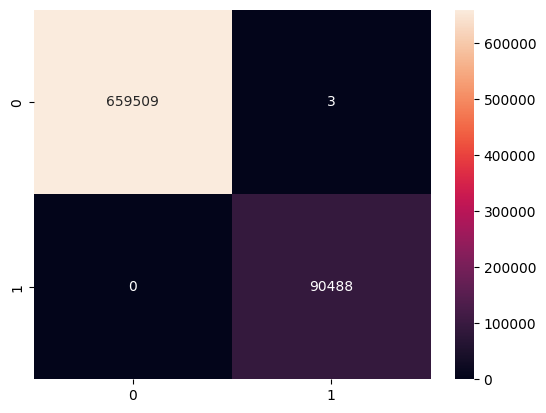

In [44]:
print('Evaluation of Training')
print(classification_report(y_train,y_pred))
sns.heatmap(data=confusion_matrix(y_train,y_pred),annot=True,fmt='d')

In [45]:
print(roc_auc_score(y_train,y_pred))

0.999997725591043


In [46]:
prediction=rf.predict_proba(x_test_sc)
df_submission['y']=prediction[:,1] 
df_submission.to_csv('submission.csv',index=False) 